# Задача 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [3]:
X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [5]:
coef

array([40.71064891,  6.60098441])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    b = []
    c = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        #if i % (iterations / 10) == 0:
            #print(f'{i}: weights={w}, MSE={err:.3f}')
        b.append(i)
        c.append(err)
        i+=1
    return w, c, b

In [7]:
X = X_
y = y_

In [8]:
w_gd_st = eval_GD(X, y, iterations=2500, eta=1e-3)[0]
y_pred = np.dot(X, w_gd_st)
err_st = calc_mse(y, y_pred)

In [9]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    b = []
    c = []
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        b.append(i)
        c.append(err)
        #if i % (iterations / 10) == 0:
            #print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err, c, b
        

In [10]:
w_sgd_st = eval_SGD(X, y, iterations=2500, eta=1e-3)[0]
y_pred = np.dot(X, w_gd_st)
err_st = calc_mse(y, y_pred)
w_sgd_st, err_st

(array([40.50993029,  6.4673205 ]), 24.358070477474925)

In [11]:
ris_1_x = eval_GD(X, y, iterations=2500, eta=1e-3)[1]
ris_1_y = eval_GD(X, y, iterations=2500, eta=1e-3)[2]
ris_2_x = eval_SGD(X, y, iterations=2500, eta=1e-3)[2]
ris_2_y = eval_SGD(X, y, iterations=2500, eta=1e-3)[3]

[]

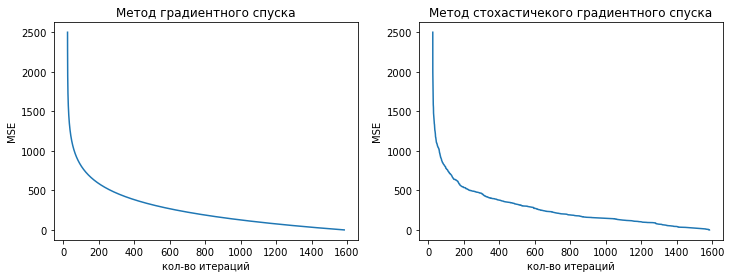

In [12]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ris_1_x,ris_1_y)
plt.xlabel('кол-во итераций')
plt.ylabel('MSE')
plt.title('Метод градиентного спуска')

plt.subplot(1, 2, 2)
plt.plot(ris_2_x,ris_2_y)
plt.xlabel('кол-во итераций')
plt.ylabel('MSE')
plt.title('Метод стохастичекого градиентного спуска')
plt.plot()

Скорость сходимости у стохастического градиентного бустинга чуть хуже, чем у обычного градиентного бустинга.

# Задача 2

[*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

In [13]:
#L1 - регуляризация
def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * w/abs(w))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [14]:
#L2 - регуляризация
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [15]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [16]:
def standardization(x: np.ndarray) -> np.ndarray:
    '''Функция принимает и возвращает одномерный массив'''
    s = (x - x.mean()) / x.std()
    return s

In [17]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standardization(X[:, 2])
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 3] = standardization(X[:, 3])

In [18]:
w = eval_model_reg1(X_st, y, iterations=1000, eta=1e-3, lambda_=1, verbose=True)

100: weights=[10.73014253  1.15140285  1.92135569  2.71404271], MSE=2262.982
200: weights=[19.1068873   1.87850048  2.64845332  3.38932984], MSE=1530.626
300: weights=[25.9638125   2.2942191   3.06417194  3.77097985], MSE=1044.289
400: weights=[31.57666385  2.53247567  3.30242851  3.98545024], MSE=719.276
500: weights=[36.17115764  2.66957066  3.4395235   4.10478485], MSE=501.304
600: weights=[39.93205774  2.74897783  3.51893067  4.17002585], MSE=354.794
700: weights=[43.01060573  2.79546806  3.5654209   4.20455256], MSE=256.147
800: weights=[45.53060291  2.82315629  3.59310913  4.22168117], MSE=189.622
900: weights=[47.59338895  2.84008625  3.61003909  4.22899462], MSE=144.686
1000: weights=[49.28191713  2.85084258  3.62079542  4.23080954], MSE=114.276


In [19]:
w = eval_model_reg2(X_st, y, iterations=1000, eta=1e-3, lambda_=0, verbose=True)

100: weights=[10.82085913  1.2141001   2.00005294  2.79354159], MSE=2252.372
200: weights=[19.27186149  1.98545772  2.77141056  3.51559346], MSE=1515.928
300: weights=[26.18957149  2.42575766  3.2117105   3.92523325], MSE=1028.590
400: weights=[31.85217926  2.67740807  3.4633609   4.156945  ], MSE=704.034
500: weights=[36.48740201  2.82154628  3.60749912  4.2873476 ], MSE=487.210
600: weights=[40.28164149  2.90440096  3.6903538   4.3600917 ], MSE=342.135
700: weights=[43.38747997  2.95231169  3.73826453  4.40004463], MSE=244.996
800: weights=[45.92981625  2.98028635  3.76623919  4.42137212], MSE=179.929
900: weights=[48.01088834  2.99687663  3.78282947  4.43214281], MSE=136.339
1000: weights=[49.71438487  3.00695578  3.79290862  4.43695166], MSE=107.133


In [20]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-3, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg1(X_st, y, iterations=1000, eta=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)


In [21]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-3, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=1000, eta=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights2 = np.array(w_list)
errors2 = np.array(error_list)


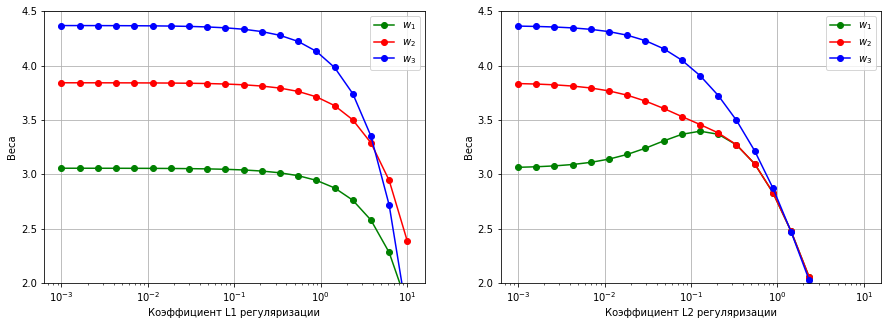

In [22]:
plt.figure(figsize=(15, 5))

#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.subplot(1, 2, 1)
plt.xscale('log')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L1 регуляризации')
plt.ylabel('Веса')
plt.ylim([2,4.5])
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
plt.xscale('log')
plt.plot(l_list, weights2[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights2[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights2[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('Веса')
plt.ylim([2,4.5])
plt.grid()
plt.legend();


L2 регуляризация с увеличением своего значения, оказывает большее влияние на величину весов, чем L1.